In [27]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [28]:
coinsHalfDollar = coins[coins['Denom'] == 'HalfDollar']
coinsHalfDollar = coinsHalfDollar[['Year', 'Mint_State', 'Value']]

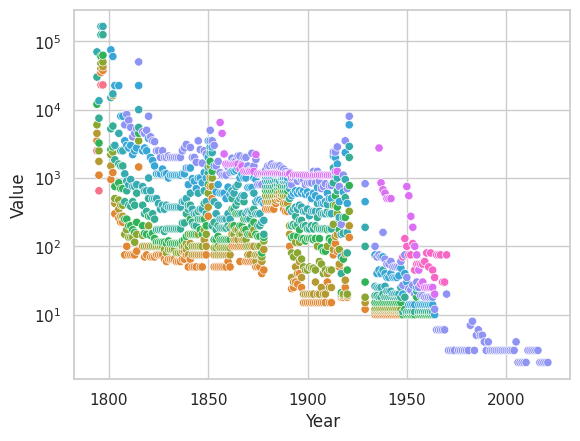

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsHalfDollar, hue='Mint_State', legend=False)
plt.yscale('log')

In [30]:
import pandas as pd

df = pd.DataFrame(coinsHalfDollar)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
      Year     Mint_State    Value
5957  1794          AGood   2500.0
5958  1794           Good   3500.0
5959  1794          VGood   4500.0
5960  1794           Fine   6000.0
5961  1794          VFine  12000.0
...    ...            ...      ...
6946  1919    MintState63   3500.0
6960  1921  AUncirculated   2900.0
6961  1921    MintState60   6000.0
6962  1921    MintState63   8000.0
6995  1936          Proof   2750.0

[113 rows x 3 columns]


In [31]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([5957, 5958, 5959, 5960, 5961, 5962, 5963, 5967, 5968, 5969, 5970,
       5971, 5972, 5973, 5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981,
       5982, 5983, 5984, 5987, 5988, 5989, 5990, 5991, 5993, 5994, 5995,
       5996, 5997, 5998, 6004, 6005, 6011, 6012, 6018, 6019, 6025, 6026,
       6032, 6033, 6039, 6040, 6046, 6047, 6053, 6054, 6060, 6061, 6067,
       6068, 6074, 6075, 6077, 6078, 6079, 6080, 6081, 6082, 6088, 6089,
       6095, 6096, 6102, 6103, 6109, 6110, 6117, 6124, 6131, 6138, 6145,
       6159, 6180, 6230, 6238, 6246, 6262, 6294, 6302, 6318, 6326, 6334,
       6339, 6340, 6341, 6342, 6348, 6349, 6350, 6358, 6383, 6392, 6401,
       6463, 6472, 6526, 6545, 6894, 6895, 6904, 6913, 6945, 6946, 6960,
       6961, 6962, 6995])

In [32]:
for i in indicies:
  coinsHalfDollar = coinsHalfDollar.drop(i)

In [33]:
coinsHalfDollar

,Year,Mint_State,Value
5964,1795,AGood,650.0
5965,1795,Good,1100.0
5966,1795,VGood,1750.0
5985,1801,Good,950.0
5986,1801,VGood,1500.0
...,...,...,...
7245,2017,MintState63,2.0
7246,2018,MintState63,2.0
7247,2019,MintState63,2.0
7248,2020,MintState63,2.0


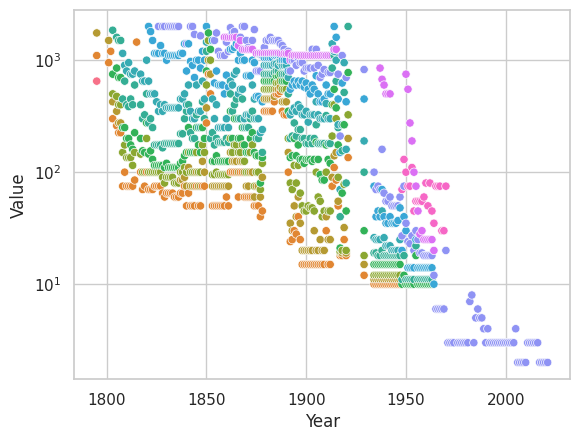

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsHalfDollar, hue='Mint_State', legend=False)
plt.yscale('log')

In [35]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsHalfDollar["Mint_State"] = lencMS.fit_transform(coinsHalfDollar["Mint_State"])
coinsHalfDollar["Mint_State"]

5964     0
5965     4
5966    10
5985     4
5986    10
        ..
7245     6
7246     6
7247     6
7248     6
7249     6
Name: Mint_State, Length: 1180, dtype: int64

In [36]:
coinsHalfDollar['log_Value'] = np.log(coinsHalfDollar['Value'])

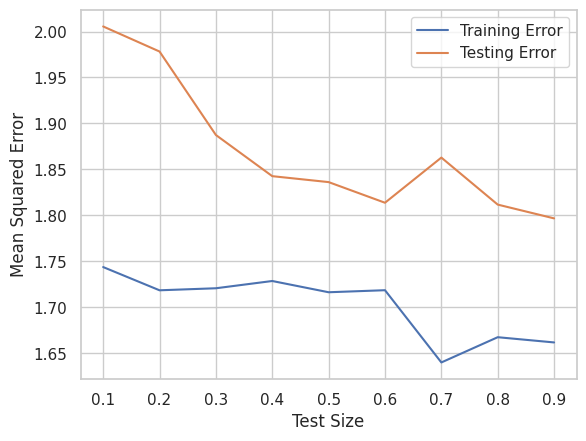

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsHalfDollar.iloc[:,0:2]
y = coinsHalfDollar.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = coinsHalfDollar.iloc[:,0:2]
Y = coinsHalfDollar.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.6, random_state=0)

In [39]:
X

,Year,Mint_State
5964,1795,0
5965,1795,4
5966,1795,10
5985,1801,4
5986,1801,10
...,...,...
7245,2017,6
7246,2018,6
7247,2019,6
7248,2020,6


In [40]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [41]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [42]:
mseModel1

97586.92338044268

In [43]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.02186388 -0.00869023]
Intercept: 46.2762644596312


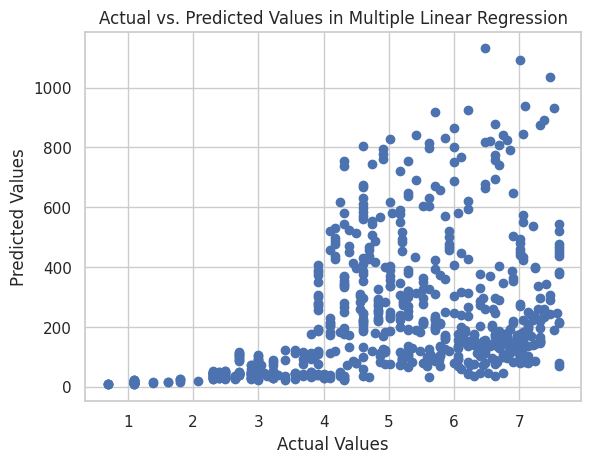

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

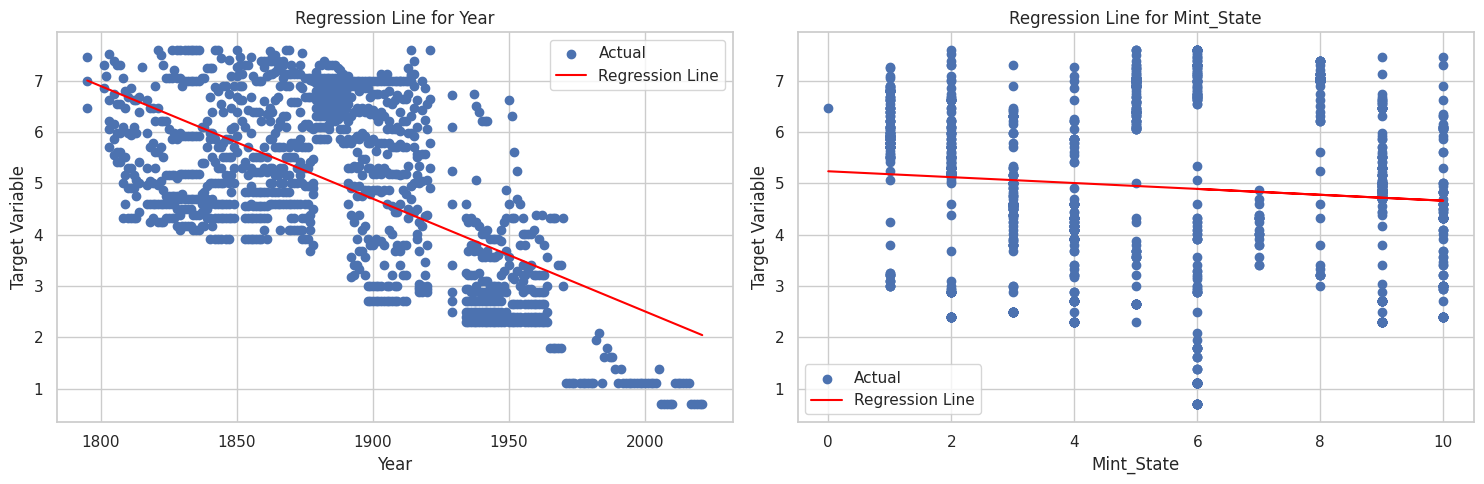

In [45]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [46]:
coinsHalfDollar[coinsHalfDollar['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value
7094,1948,7,70.0,4.248495
7099,1949,7,130.0,4.867534
7104,1950,7,100.0,4.605170
7110,1951,7,75.0,4.317488
7116,1952,7,75.0,4.317488
7122,1953,7,110.0,4.700480
7128,1954,7,45.0,3.806662
7134,1955,7,55.0,4.007333
7140,1956,7,55.0,4.007333
7146,1957,7,55.0,4.007333


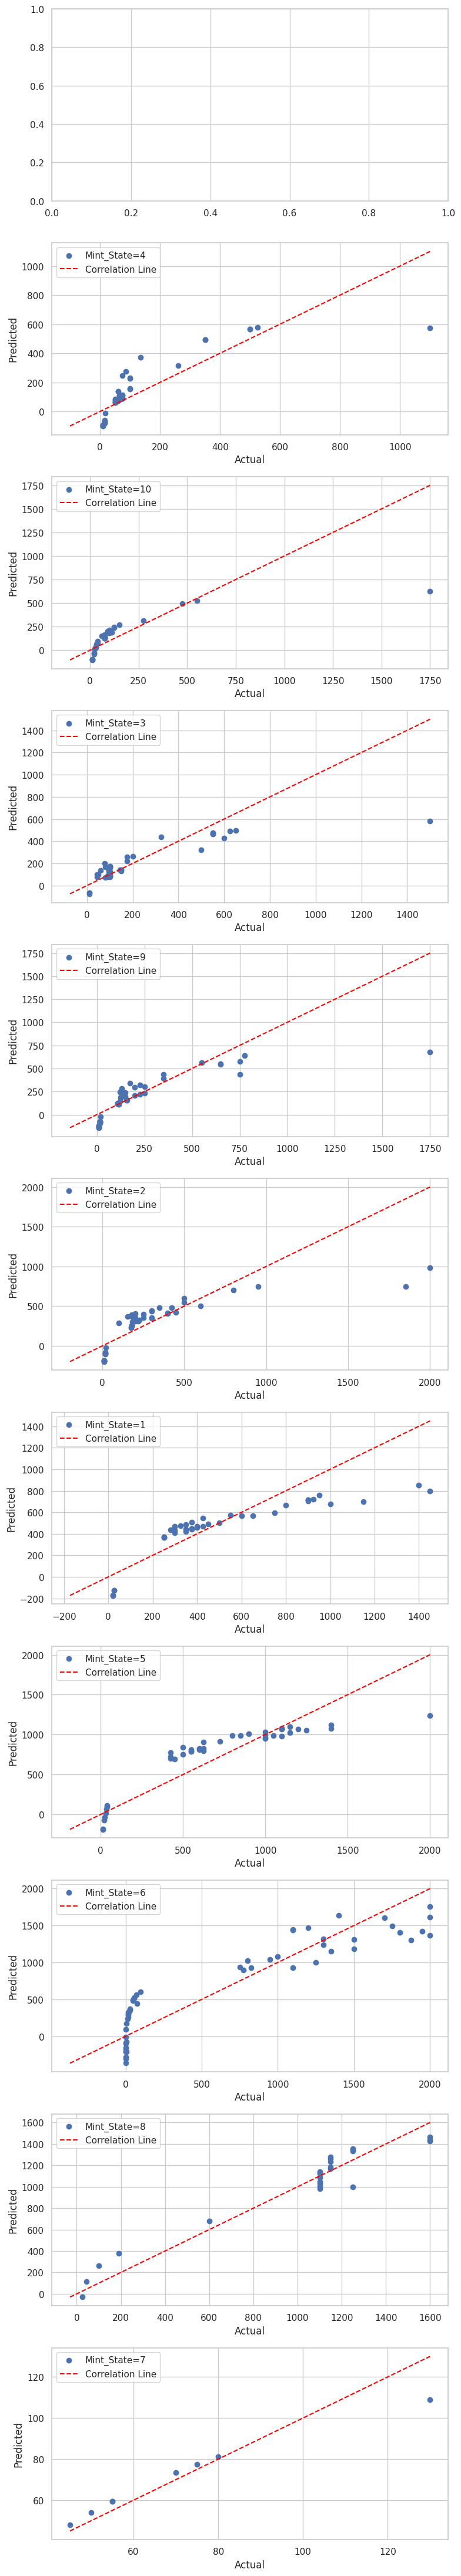

In [47]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsHalfDollar.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsHalfDollar['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsHalfDollar[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsHalfDollar[coinsHalfDollar[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

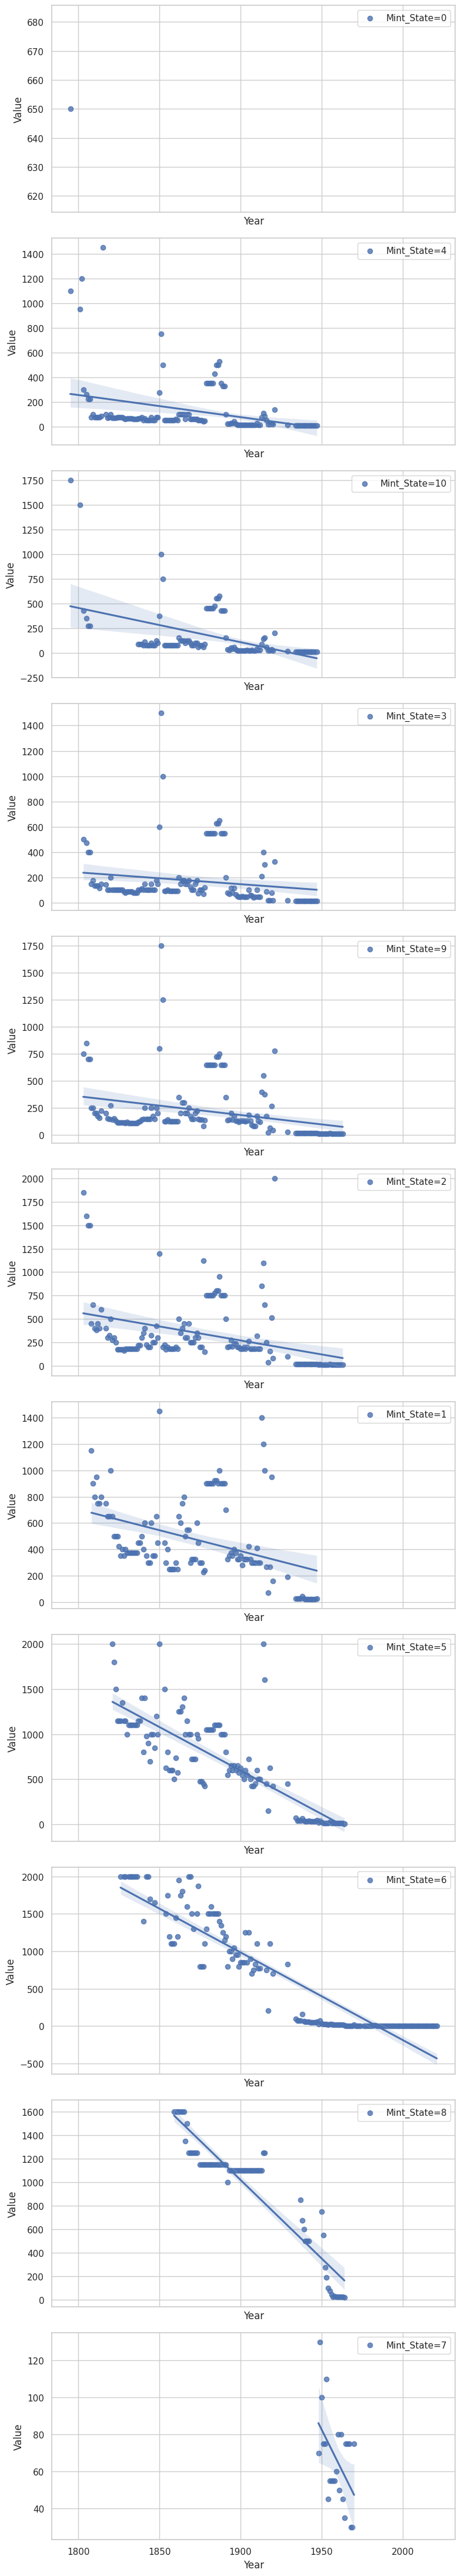

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsHalfDollar[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsHalfDollar[coinsHalfDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


            Year  Mint_State  Value  log_Value
Year         NaN         NaN    NaN        NaN
Mint_State   NaN         NaN    NaN        NaN
Value        NaN         NaN    NaN        NaN
log_Value    NaN         NaN    NaN        NaN
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.328345  -0.612584
Mint_State       NaN         NaN       NaN        NaN
Value      -0.328345         NaN  1.000000   0.786353
log_Value  -0.612584         NaN  0.786353   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.465824  -0.700314
Mint_State       NaN         NaN       NaN        NaN
Value      -0.465824         NaN  1.000000   0.779876
log_Value  -0.700314         NaN  0.779876   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.175644  -0.527656
Mint_State       NaN         NaN       NaN        NaN
Value      -0.175644         NaN  1.000000   0.799151
log_Value

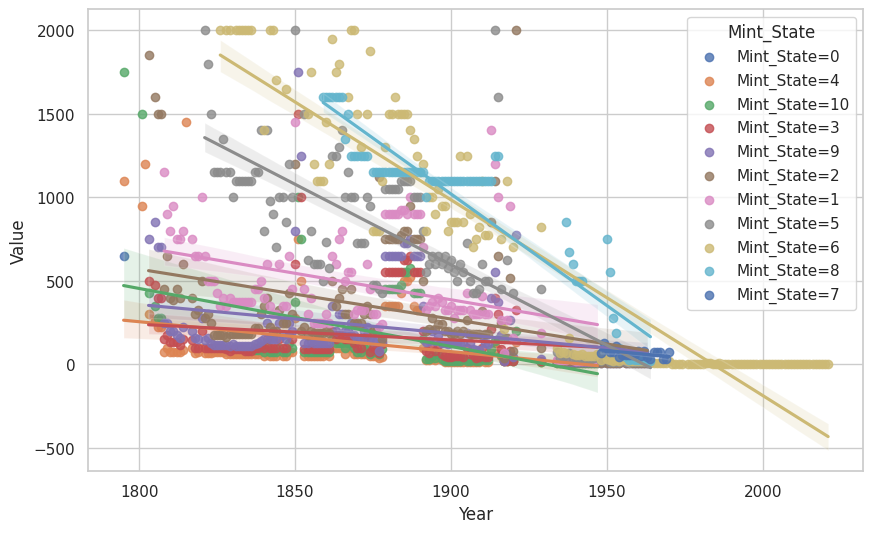

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfDollar[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfDollar[coinsHalfDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [50]:
overall_correlation_matrix = coinsHalfDollar.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.146243,-0.342148,-0.625218
Mint_State,0.146243,1.000000,0.007111,-0.097394
Value,-0.342148,0.007111,1.000000,0.811049
log_Value,-0.625218,-0.097394,0.811049,1.000000


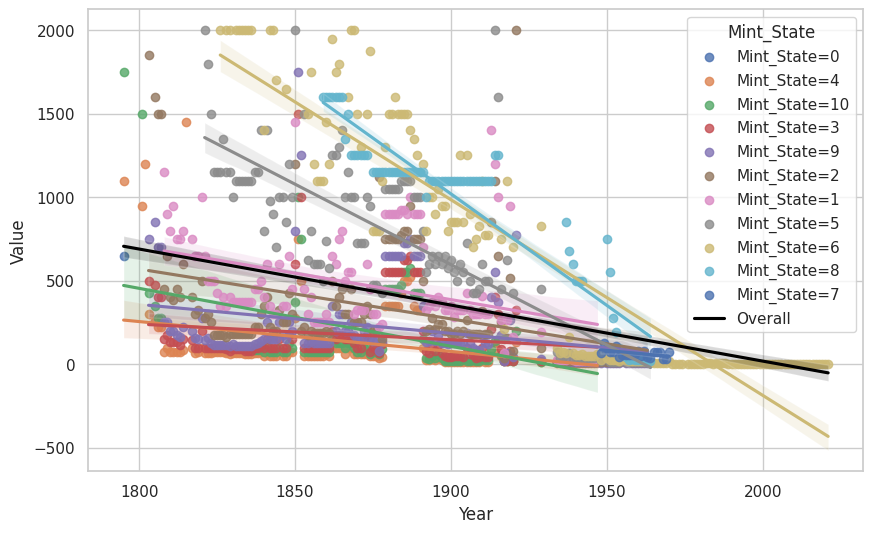

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfDollar[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfDollar[coinsHalfDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsHalfDollar[attribute_column], y=coinsHalfDollar[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

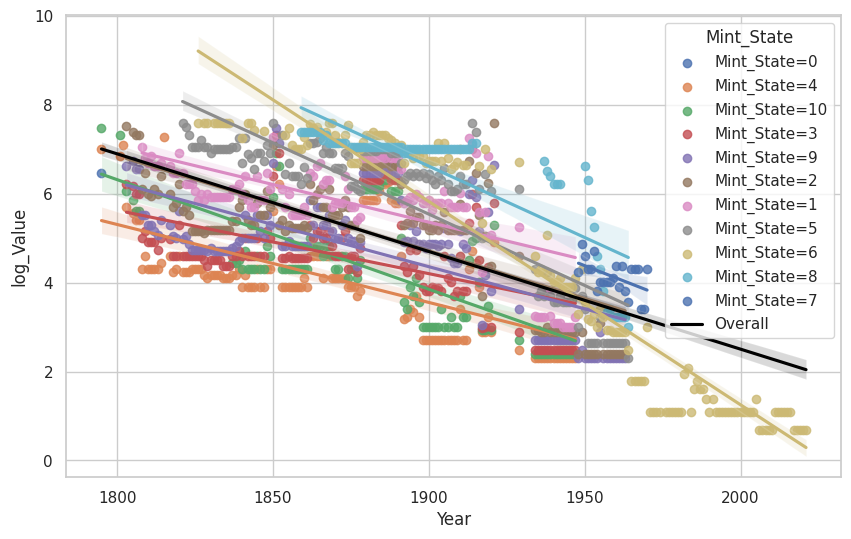

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfDollar[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfDollar[coinsHalfDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsHalfDollar[attribute_column], y=coinsHalfDollar[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()